In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import matplotlib.dates as mdates
from datetime import datetime

In [85]:
df1 = pd.read_csv('./Data/Past_def/December2016.csv')
df2 = pd.read_csv('./Data/Past_def/January2017.csv')
df3 = pd.read_csv('./Data/Past_def/February2017.csv')
df4 = pd.read_csv('./Data/Past_def/March2017.csv')

In [87]:
df = df1.append(df, ignore_index = True).append(df3, ignore_index = True).append(df4, ignore_index = True)

In [88]:
df.columns.values

array(['Unnamed: 0', 'link', 'dep_day', 'dep_time', 'dep_city', 'dep_lat',
       'dep_long', 'dep_addr', 'arr_city', 'arr_lat', 'arr_long',
       'arr_addr', 'price', 'distance', 'seatsleft', 'seats', 'trip_id',
       'stops', 'bookmode', 'booktype'], dtype=object)

In [89]:
print len(df)

17775


In [177]:
df2 = df[['dep_day','seats']]

In [178]:
newdf1 = df2.groupby(df2['dep_day']).sum()
newdf1.index = pd.to_datetime(newdf1.index)

In [143]:
print newdf.index

DatetimeIndex(['2016-12-30', '2016-12-31', '2017-01-01', '2017-01-02',
               '2017-01-03', '2017-01-04', '2017-01-05', '2017-01-06',
               '2017-01-07', '2017-01-08', '2017-01-09', '2017-01-10',
               '2017-01-11', '2017-01-12', '2017-01-13', '2017-01-14',
               '2017-01-15', '2017-01-16', '2017-01-17', '2017-01-18',
               '2017-01-19', '2017-01-20', '2017-01-21', '2017-01-22',
               '2017-01-23', '2017-01-24', '2017-01-25', '2017-01-26',
               '2017-01-27', '2017-01-28', '2017-01-29', '2017-01-30',
               '2017-01-31', '2017-02-01', '2017-02-02', '2017-02-03',
               '2017-02-04', '2017-02-05', '2017-02-06', '2017-02-07',
               '2017-02-08', '2017-02-09', '2017-02-10', '2017-02-11',
               '2017-02-12', '2017-02-13', '2017-02-14', '2017-02-15',
               '2017-02-16', '2017-02-17', '2017-02-18', '2017-02-19',
               '2017-02-20', '2017-02-21', '2017-02-22', '2017-02-23',
      

In [179]:
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter("%Y-%m-%d"))
plt.gca().xaxis.set_major_locator(mdates.DayLocator())
plt.plot(newdf1.index, newdf1['seats'])
plt.gcf().autofmt_xdate()

#plt.savefig('seats_tot.png')

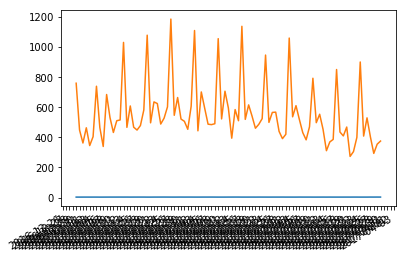

In [180]:
plt.show()

In [150]:
print newdf.loc[newdf['seats'].argmax(), :]


seats    1185
Name: 2017-01-27 00:00:00, dtype: int64


In [160]:
df3 = df[['dep_day','seatsleft']]

seatsleft    925
Name: 2017-01-27 00:00:00, dtype: int64


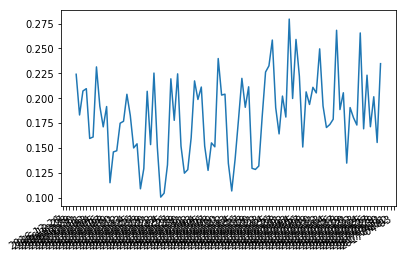

In [182]:
newdf = df3.groupby(df3['dep_day']).sum()
newdf.index = pd.to_datetime(newdf.index)

print newdf.loc[newdf['seatsleft'].argmax(), :] # venerdì

plt.gca().xaxis.set_major_formatter(mdates.DateFormatter("%Y-%m-%d"))
plt.gca().xaxis.set_major_locator(mdates.DayLocator())
plt.plot(newdf.index, 1-newdf['seatsleft']/newdf1['seats'])
plt.gcf().autofmt_xdate()
#plt.savefig('seats_left_tot.png')

plt.show()


In [101]:
# controllo sui nomi delle città
strange_names = set()

cities = df['arr_city']
for c in cities:
    if not c.isalpha():
        strange_names.add(c)

print len(strange_names)
        
for c in strange_names:
    print c

712
Str. Passo del Brallo - Dezza, Italia
Spinetta Marengo
Via S. Michele Campagna, 43036 Fidenza PR, Italia
Via Fossona, 35030 Fossona PD, Italia
Tangenziale Nord, Torino, TO
San Fedele Intelvi
Bagni Di Lucca
Producena-Teola
Via Stazione Vecchia, 47822 Santarcangelo di Romagna RN, Italia
Gambolò
Ponte Taro
La Spezia, Italie
Al Ponte
San Giuseppe Vesuviano
Pove Del Grappa
Aeroporto di Bergamo / Orio al Serio, Orio al serio, Bergamo
A1 - Autostrada del Sole, Sesto Fiorentino FI, Italia
Tangenziale Nord, Torino, TO, Italia
Malpensa Terminal 1, Ferno, VA, Italia
Borgo San Lorenzo
San Carlo
Friburgo in Brisgovia
Trezzano Sul Naviglio
Arenys De Mar
Campi Bisenzio
Castel San Giovanni
Orcenico Superiore
Bellinzago Novarese
Laveno-Mombello Nord, Lombardia
Str. Cà Bianca, 38, 27058 Voghera PV, Italia
McDonald's, Friuli-Venezia Giulia
Sesto San Giovanni
Périssac
La Roche-sur-Foron
Via Luigi Giulotto, Pavia, PV
A14 - Autostrada Adriatica, 47838 Riccione RN, Italia
Via Alberto Lionello, 00139 Roma

In [113]:
# lat and long
latlong = df[['arr_lat','arr_long','dep_day']]
latlong['dep_day'] = pd.to_datetime(latlong['dep_day'])

#plt.plot(latlong['arr_long'],latlong['arr_lat'], '.')

#plt.show()

/opt/conda/lib/python2.7/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


In [117]:
df.head()

,Unnamed: 0,link,dep_day,dep_time,dep_city,dep_lat,dep_long,dep_addr,arr_city,arr_lat,arr_long,arr_addr,price,distance,seatsleft,seats,trip_id,stops,bookmode,booktype
0,0,https://www.blablacar.it/passaggio-milano-bern...,2016-12-30,05:50:00,Milano,45.465422,9.185924,"Milano, MI",Berna,46.947974,7.447447,"Berna, Svizzera",21.5,355,1,2,707543501-milano-berna,"[Torino, Milano, Berna, Amburgo]",manual,online
1,1,https://www.blablacar.it/passaggio-milano-bres...,2016-12-30,06:00:00,Milano,45.465424,9.185925,"Milano, MI, Italia",Brescia,45.541553,10.211802,"Brescia, BS, Italia",7.5,96,1,3,704667003-milano-brescia,"[Milano, Brescia, Canazei]",manual,online
2,2,https://www.blablacar.it/passaggio-milano-mona...,2016-12-30,06:00:23,Milano,45.484579,9.204914,"Stazione Centrale, Milan",Monaco Di Baviera,48.135125,11.581981,"Monaco di Baviera, Germania",32.5,496,3,3,703069533-milano-monaco-di-baviera,"[Milano, Monaco Di Baviera]",auto,online
3,3,https://www.blablacar.it/passaggio-milano-napo...,2016-12-30,07:00:03,Milano,45.437243,9.168133,"Famagosta, 20142 Milano, Italia",Napoli,40.851775,14.268124,"Napoli, Italia",47.0,772,4,4,708114491-milano-napoli,"[Milano, Napoli]",manual,online
4,4,https://www.blablacar.it/passaggio-milano-nola...,2016-12-30,07:00:04,Milano,45.465422,9.185924,"Milano, Italia",Nola,40.927088,14.528886,"80035 Nola NA, Italia",50.0,771,1,1,691777522-milano-nola,"[Milano, Nola]",manual,online


In [130]:
# distance
fig = df.hist(column = 'distance', bins = 20)

plt.savefig('distances_hist.png')

In [127]:
sum(df['distance'] < 250)

12794

In [128]:
df[df['distance'] < 250]['len_trip'] = 'short'

/opt/conda/lib/python2.7/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
